# Homework 3
Using the example found in "Neural Nets Demystified", and in the NeuralNet.ipynb provided, write a function that minimizes the cost function to a given accuracy set in advance by you. Do not get confused by accuracy, say you want to go below 0.1% of the initial cost function. Notice that the script does part of the work for you. Also plot the cost (J) vs iteration step.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

class Neural_Network(object):
    # Initialize Neural Network Structure
    def __init__(self):
        #Define HyperParameters to fix structure of NN
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        #Define Weights which will be first set to random (ie Initial Weights)
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)
    
    # Create hidden layers and apply functions to data
    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    # Making the model more accurate with the cost function
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2) # the smaller J is the more accurate the NN was in predicting y^hat
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        
        return dJdW1,dJdW2

### Create training set

In [2]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [3]:
X # [Hours slept, Hours studied]

array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  1.]])

In [4]:
y # [Score on test]

array([[75.],
       [80.],
       [93.]])

### Scaling data

In [5]:
# Do not run this cell again unless you restart the kernel first because it will just end up re-scaling the already scaled data!

# Normalizing hours/test scores to be 0 <= X, y <= 1
X=X/np.amax(X,axis=0)
y=y/100 # 100 being the max test score

In [6]:
X,y

(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.2]]),
 array([[0.75],
        [0.8 ],
        [0.93]]))

### Building neural net

In [7]:
NN=Neural_Network()

In [8]:
yH=NN.forward(X)

In [9]:
y, yH # yH = y^hat, or an estimate of y

(array([[0.75],
        [0.8 ],
        [0.93]]),
 array([[0.74148052],
        [0.72586316],
        [0.74112571]]))

### Training neural net

Since we want to minimize cost we'll be using the negative direction of change.

In [10]:
def grad_descent(initial_cost, scalar, n):
    iteration = [initial_cost]
    cost = initial_cost
    dJdW1,dJdW2 = NN.costFunctionPrime(X,y)
    while len(iteration) < n:
        NN.W1 = NN.W1-scalar*dJdW1
        NN.W2 = NN.W2-scalar*dJdW2
        cost = NN.costFunction(X,y)
        iteration.append(cost)
    return iteration

In [11]:
minimizing = grad_descent(NN.costFunction(X,y), 0.1, 70)

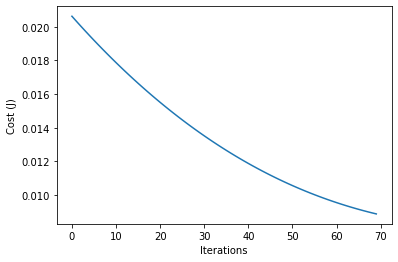

In [12]:
iterations = np.arange(0, len(minimizing), 1)
plt.plot(iterations, minimizing)
plt.xlabel("Iterations")
plt.ylabel("Cost (J)");

In [13]:
min(minimizing) # lowest value at 70th iteration

array([0.00888202])

The graph reaches its global minimum after ~70 iterative steps with an iterative step of 0.1, which is when the cost (J) is the lowest and when the NN has the least error for the 3 predictions ie y_hat is more or less equal to the y observations.